# **Loan Prediction**

Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.





In [604]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [605]:
from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [606]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score



# **1.Reading the data to python environment**

In [607]:
data=pd.read_csv('/content/train_ctrUa4K.csv')

In [608]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# **Preprocessing**

In [609]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [610]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# **Treating the missing values**

In [611]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())


In [612]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [613]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# **Checking the target variable is binary**

<ipython-input-614-9a7c71c7d577>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status',data=data,palette='hls')


<Axes: xlabel='Loan_Status', ylabel='count'>

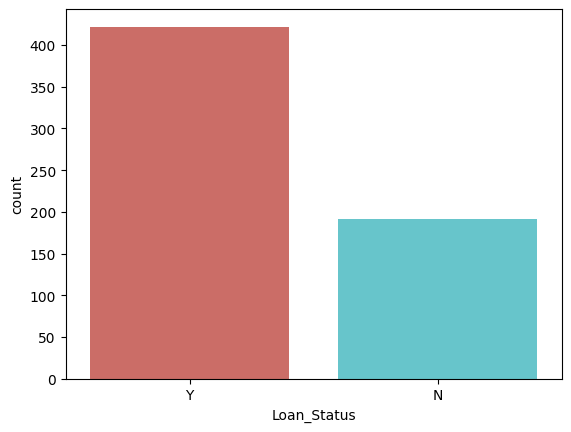

In [614]:
sns.countplot(x='Loan_Status',data=data,palette='hls')

The target feature selected is loan_Status

In [615]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# **Label Encoding the features**

In [616]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data1=data[['Gender','Married','Education','Self_Employed','Property_Area','Dependents','Loan_Status']]

data1_en=data1.apply(lb.fit_transform)
data1_en

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,Loan_Status
0,1,0,0,0,2,0,1
1,1,1,0,0,0,1,0
2,1,1,0,1,2,0,1
3,1,1,1,0,2,0,1
4,1,0,0,0,2,0,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,0,0,0,3,1
611,1,1,0,0,2,1,1
612,1,1,0,0,2,2,1


In [617]:
data=data.drop(['Gender','Married','Education','Self_Employed','Property_Area','Dependents','Loan_Status'],axis=1)

In [618]:
data=pd.concat([data,data1_en],axis=1,verify_integrity=True)

In [619]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         614 non-null    float64
 4   Loan_Amount_Term   614 non-null    float64
 5   Credit_History     614 non-null    float64
 6   Gender             614 non-null    int64  
 7   Married            614 non-null    int64  
 8   Education          614 non-null    int64  
 9   Self_Employed      614 non-null    int64  
 10  Property_Area      614 non-null    int64  
 11  Dependents         614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [620]:
data=data.drop(['Loan_ID'],axis=1)

In [621]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   Gender             614 non-null    int64  
 6   Married            614 non-null    int64  
 7   Education          614 non-null    int64  
 8   Self_Employed      614 non-null    int64  
 9   Property_Area      614 non-null    int64  
 10  Dependents         614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


# **Exploratory Data Anlysis**

<ipython-input-622-c6693d6c8f75>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents',data=data,palette='hls')


<Axes: xlabel='Dependents', ylabel='count'>

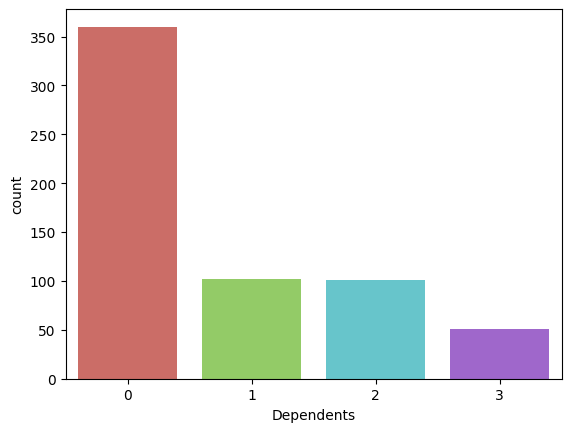

In [622]:
sns.countplot(x='Dependents',data=data,palette='hls')

<Axes: >

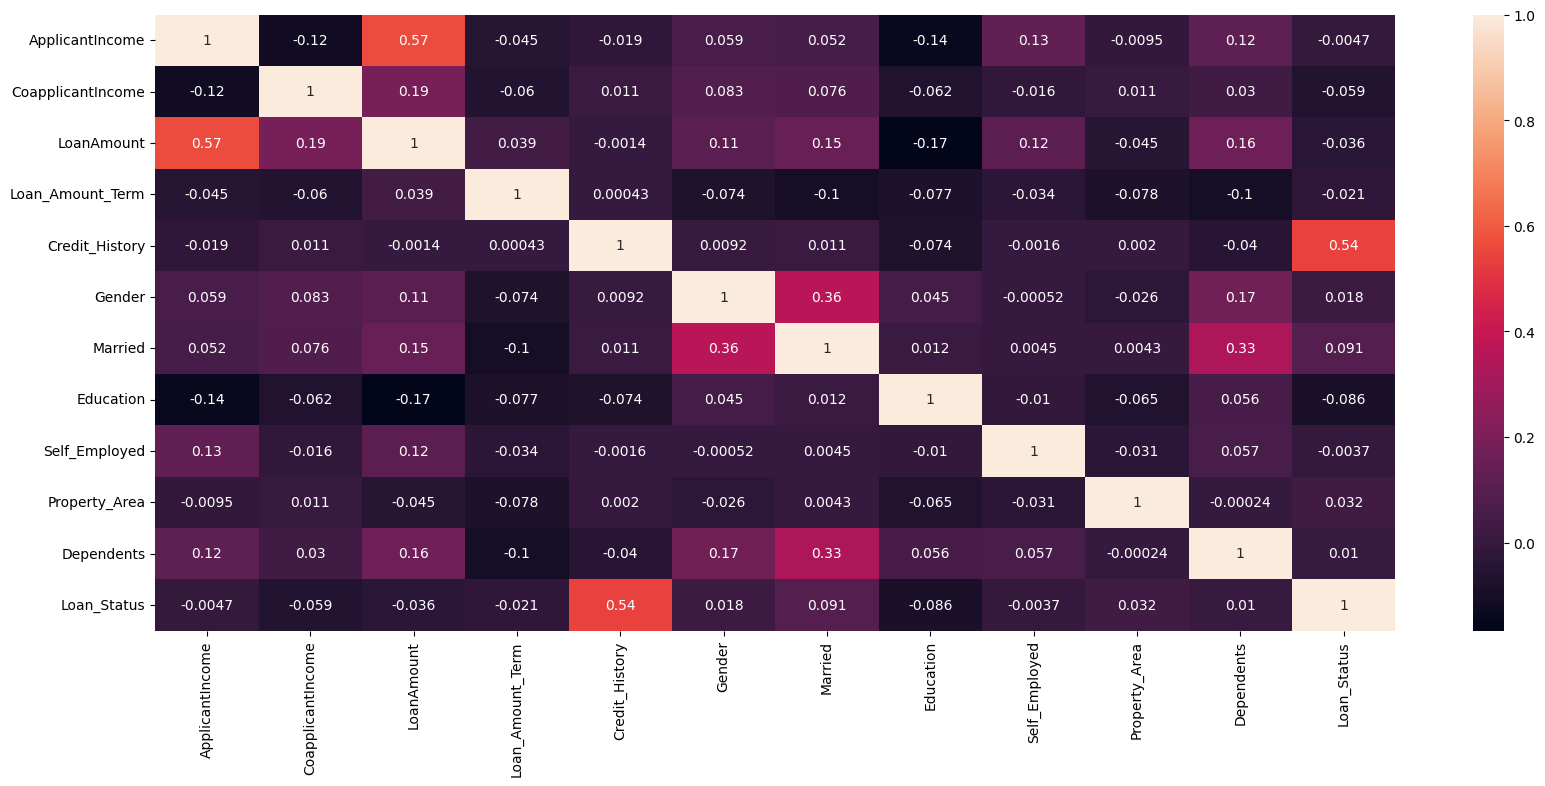

In [623]:
plt.subplots(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)

[]

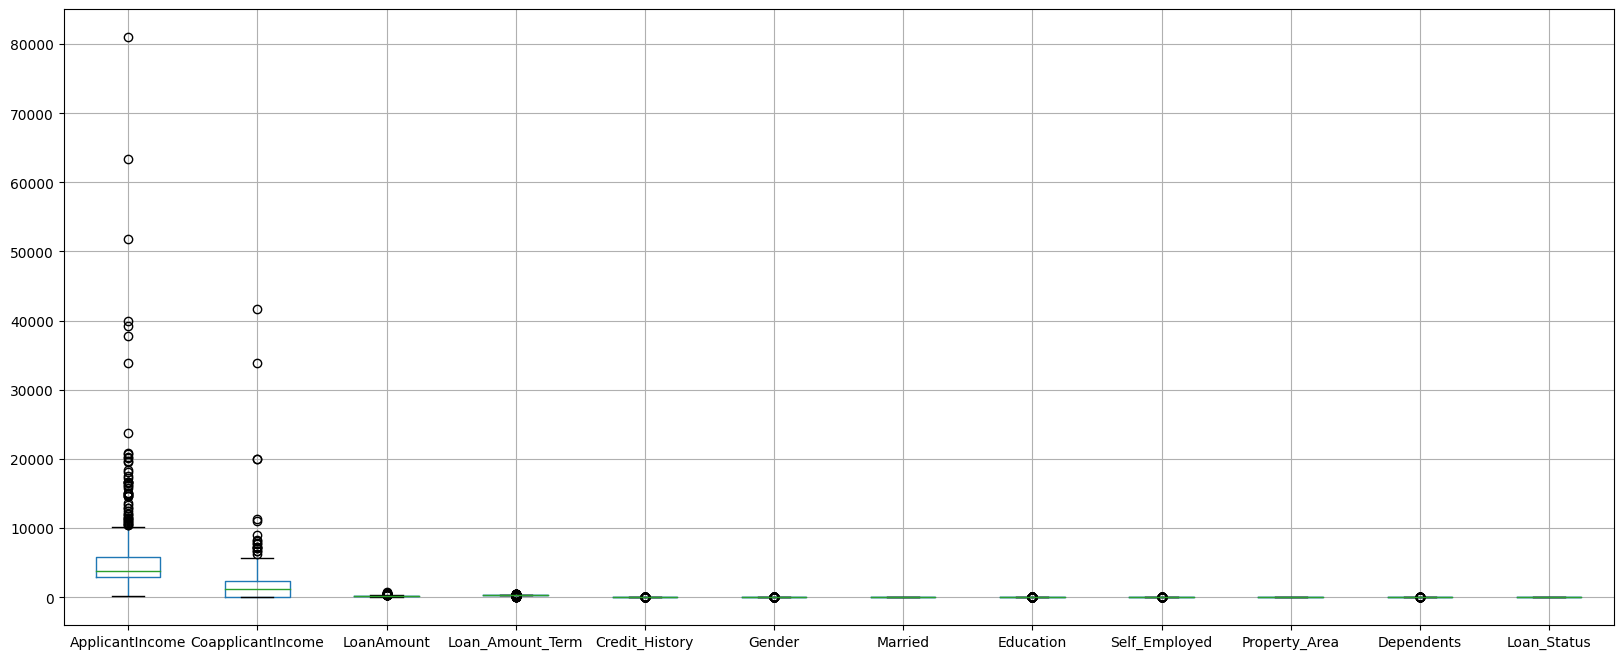

In [624]:
plt.subplots(figsize=(20,8))
data.boxplot(return_type='dict')
plt.plot()

Maximum outliers are for Applicant income,coapplicant income

# **Outlier handling**

Applicant Income

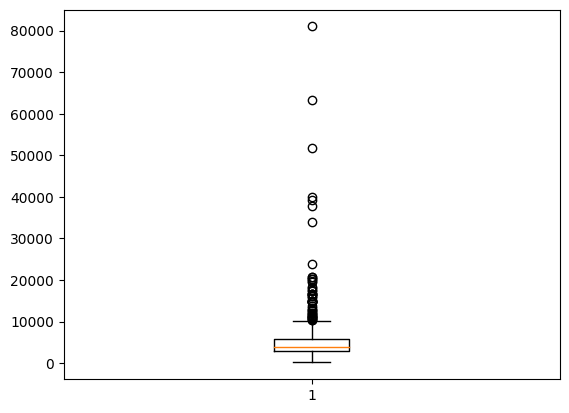

In [625]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

In [626]:
Q1=np.percentile(data['ApplicantIncome'],25,method='midpoint')
Q2=np.percentile(data['ApplicantIncome'],50,method='midpoint')
Q3=np.percentile(data['ApplicantIncome'],75,method='midpoint')
print(Q1,Q2,Q3)

2879.0 3812.5 5790.0


In [627]:
IQR=Q3-Q1
print(IQR)


2911.0


In [628]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('lower whisker',low_lim,'upper whisker',up_lim)

lower whisker -1487.5 upper whisker 10156.5


In [629]:
outlier=[]
for x in data['ApplicantIncome']:
  if((x<low_lim)or (x>up_lim)):
    outlier.append(x)
print(outlier)

[12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]


In [630]:
from abc import update_abstractmethods
data['ApplicantIncome'] =data['ApplicantIncome'].clip(lower=low_lim,upper=up_lim)

In [631]:
outlier=[]
for x in data['ApplicantIncome']:
  if((x<low_lim)or (x>up_lim)):
    outlier.append(x)
print(outlier)

[]


Loan amount

In [632]:
Q1=np.percentile(data['LoanAmount'],25,method='midpoint')
Q2=np.percentile(data['LoanAmount'],50,method='midpoint')
Q3=np.percentile(data['LoanAmount'],75,method='midpoint')
print(Q1,Q2,Q3)

100.5 129.0 164.5


In [633]:
IQR=Q3-Q1
print(IQR)


64.0


In [634]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('lower whisker',low_lim,'upper whisker',up_lim)

lower whisker 4.5 upper whisker 260.5


In [635]:
outlier=[]
for x in data['LoanAmount']:
  if((x<low_lim)or (x>up_lim)):
    outlier.append(x)
print(outlier)

[267.0, 349.0, 315.0, 320.0, 286.0, 312.0, 265.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]


In [636]:
from abc import update_abstractmethods
data['LoanAmount'] =data['LoanAmount'].clip(lower=low_lim,upper=up_lim)

In [637]:
outlier=[]
for x in data['LoanAmount']:
  if((x<low_lim)or (x>up_lim)):
    outlier.append(x)
print(outlier)

[]


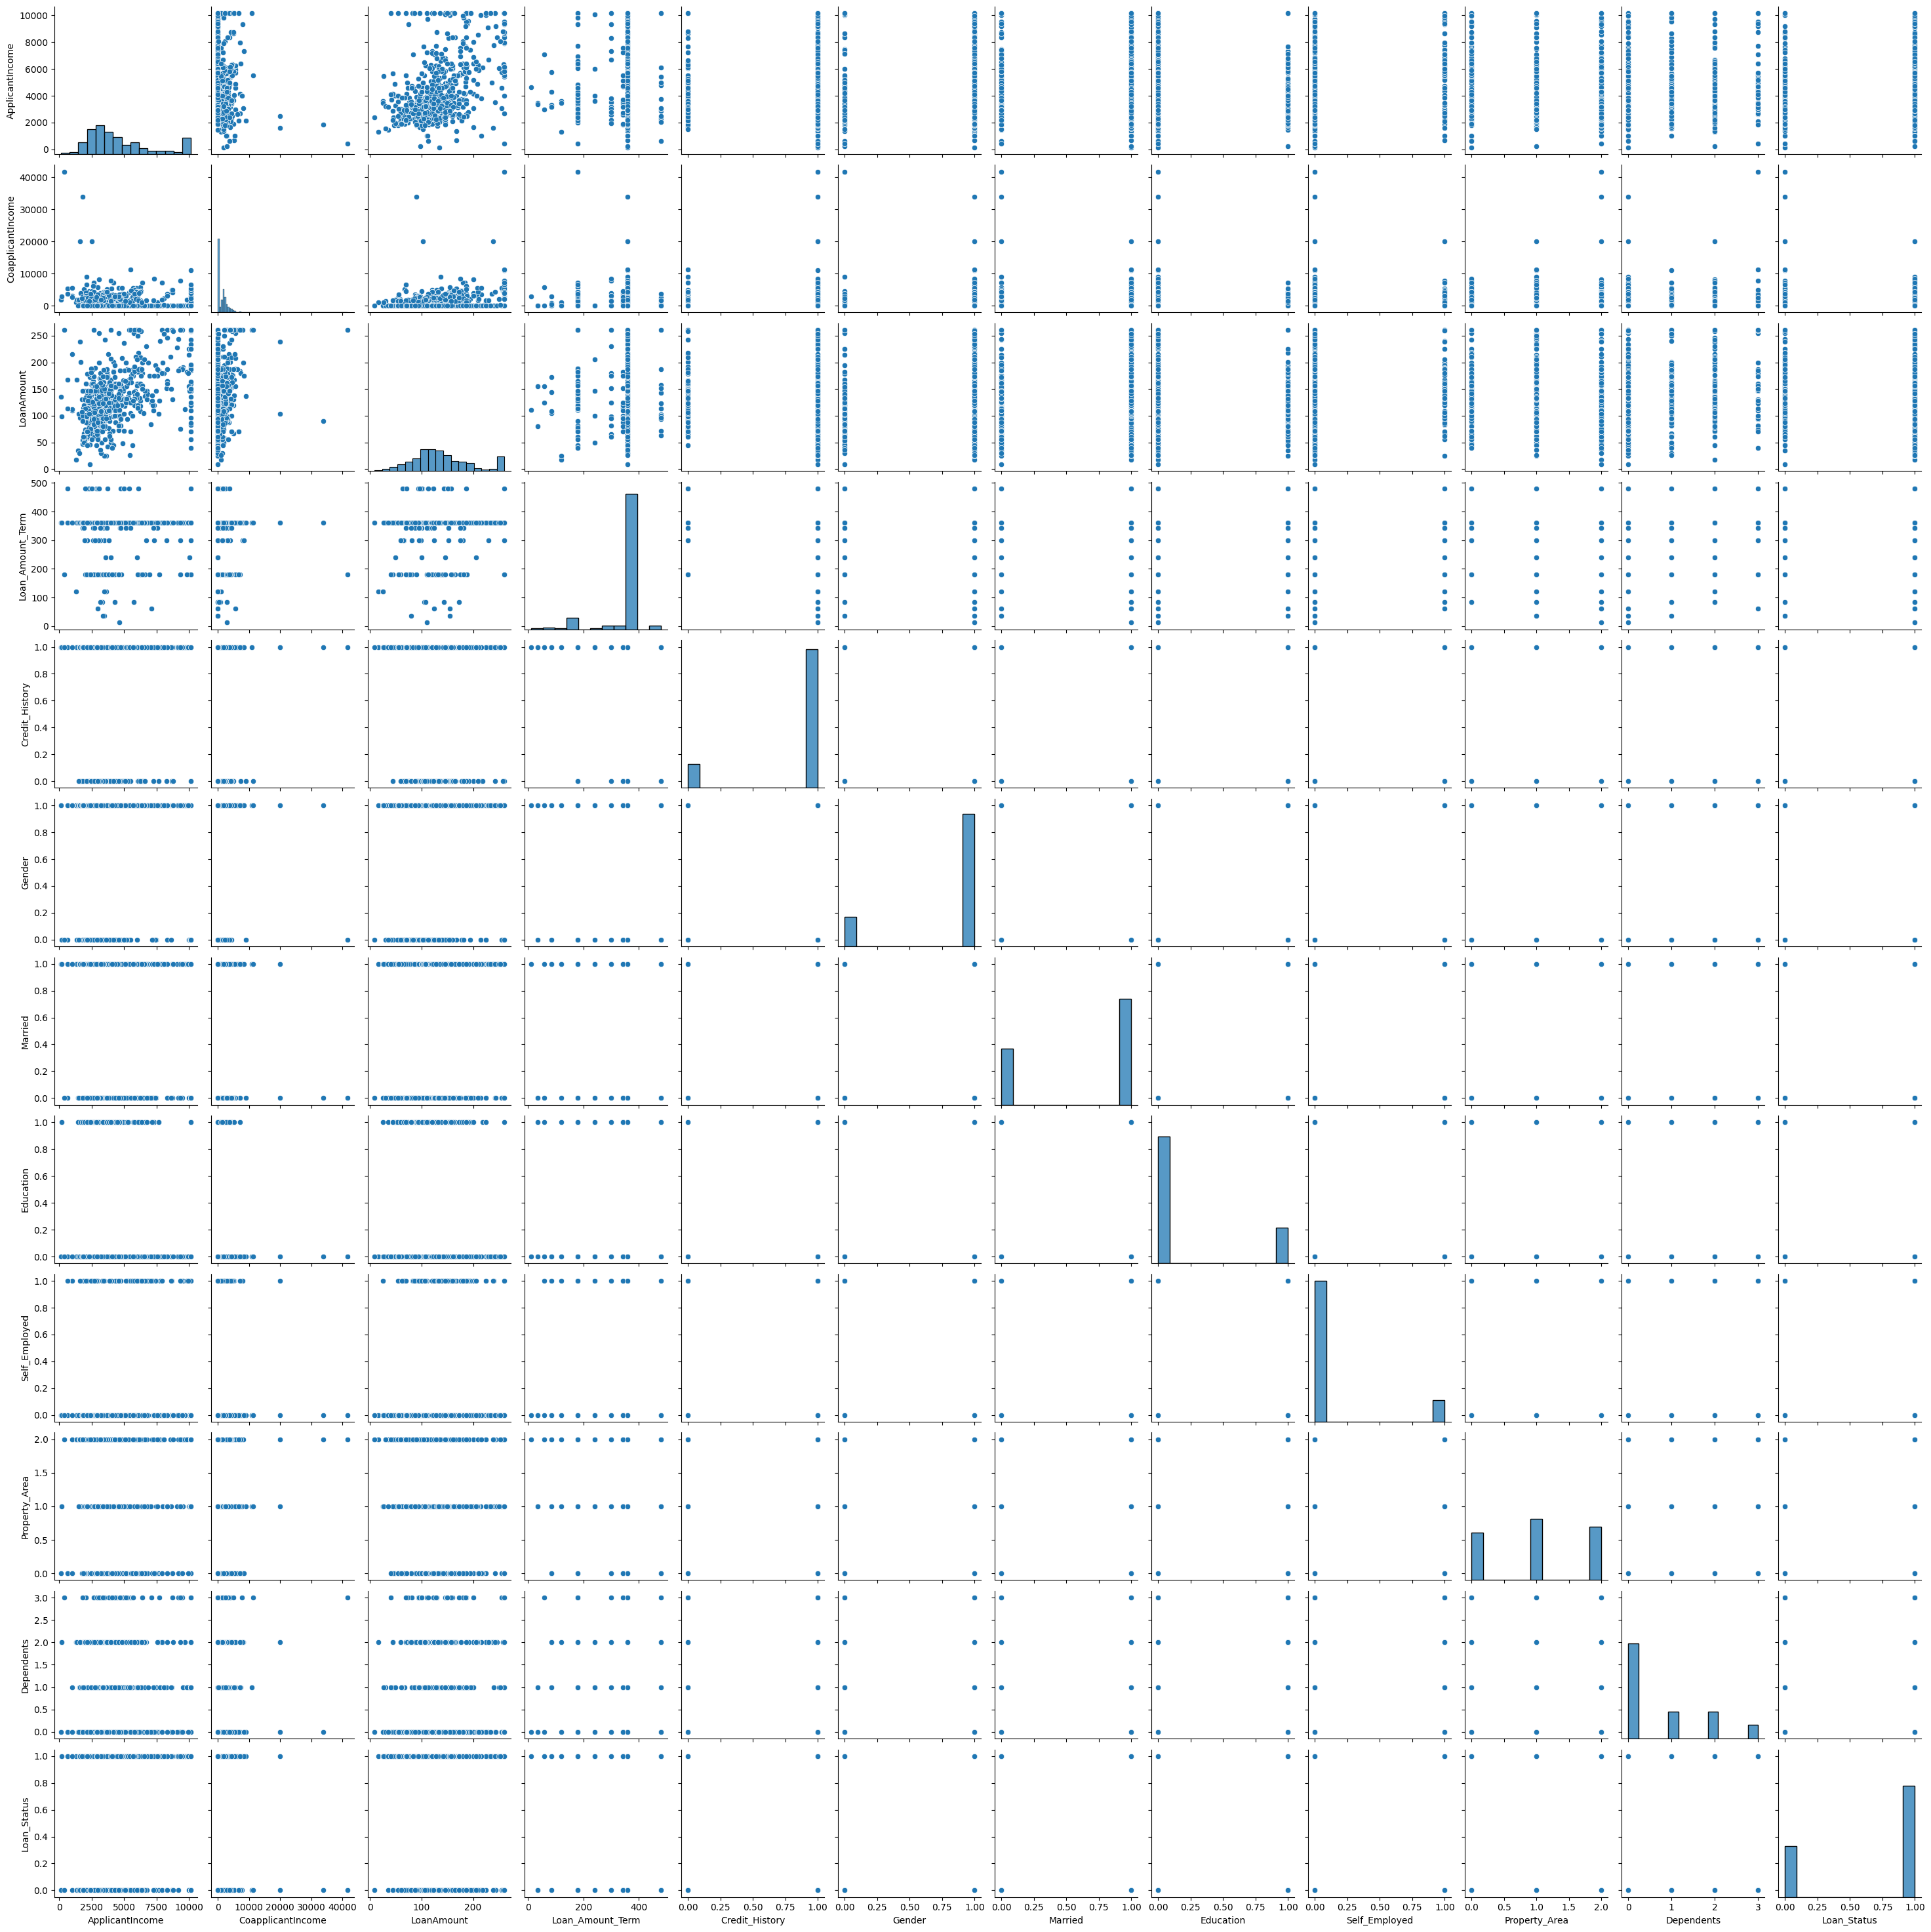

In [638]:
sns.pairplot(data)

# **Loan_Status distribution**

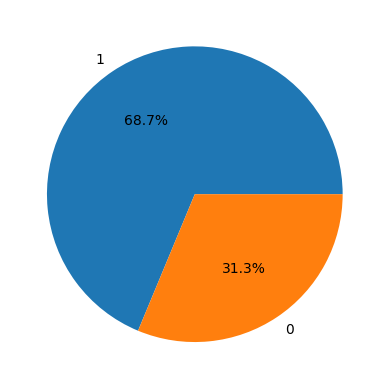

In [639]:
temp = data['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

# **Loan_status verses Gender and Marrital status**

<ipython-input-640-2ae796686b9f>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)


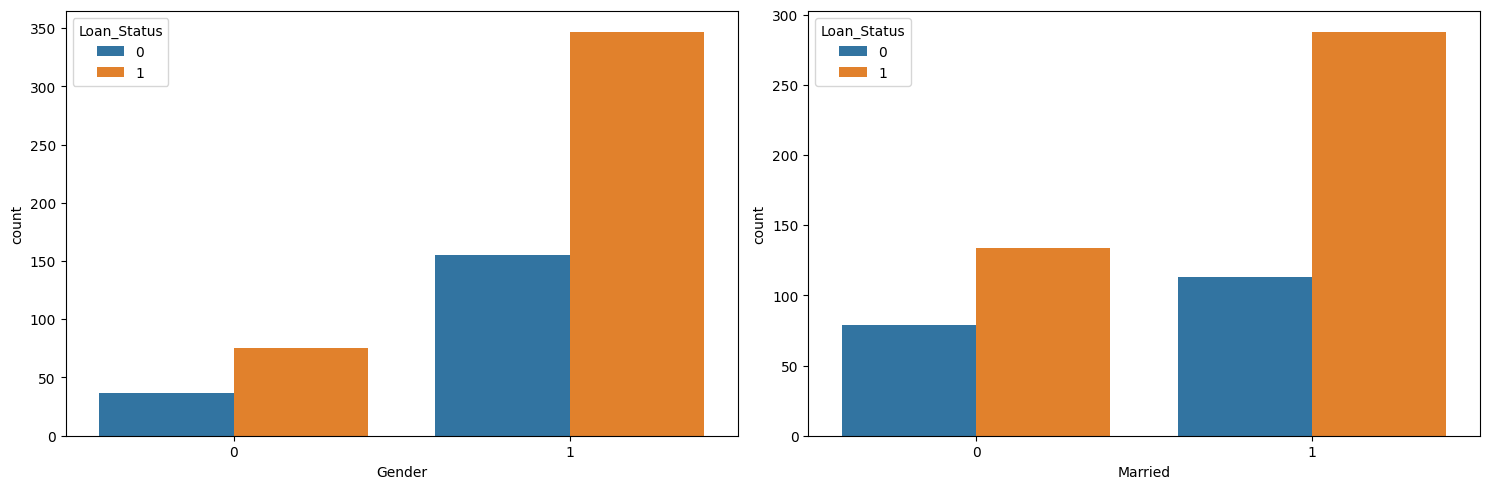

In [640]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sns.countplot(data=data, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()

Male gender got maximun number of loans compared to female.
Married people got maximum number of loans compared to unmarried.

Histogram showing the applicant income and loan amount distribution

<ipython-input-641-846933a2905a>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)
<ipython-input-641-846933a2905a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
<ipython-input-641-846933a2905a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use

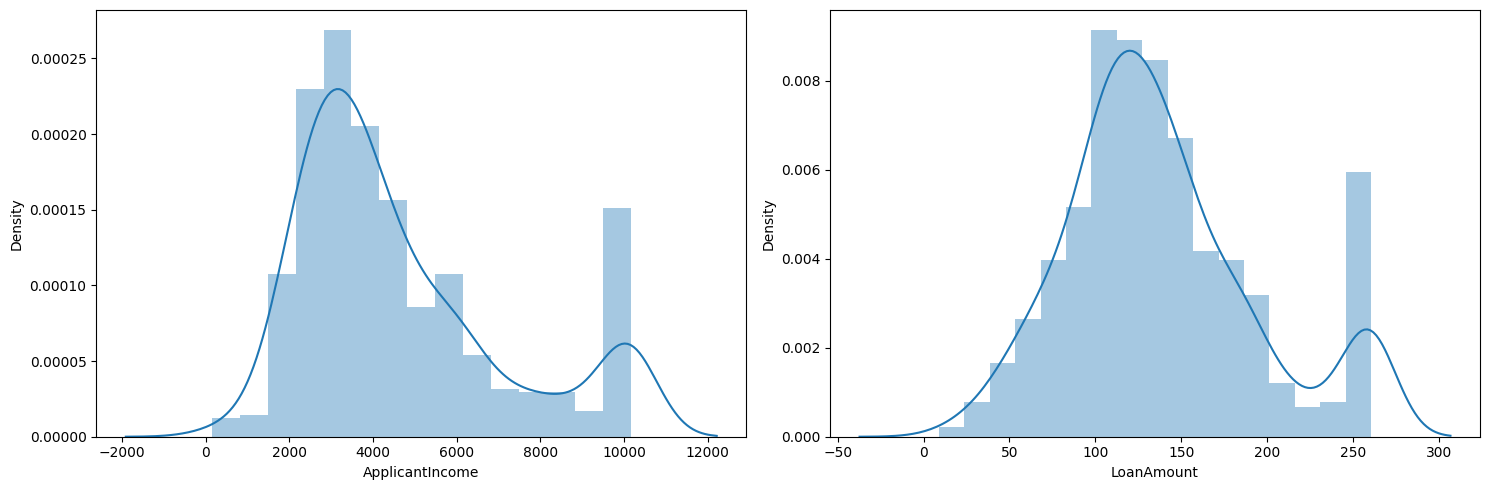

In [641]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sns.distplot(data[col])
plt.tight_layout()
plt.show()

<ipython-input-642-576e4185315b>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)


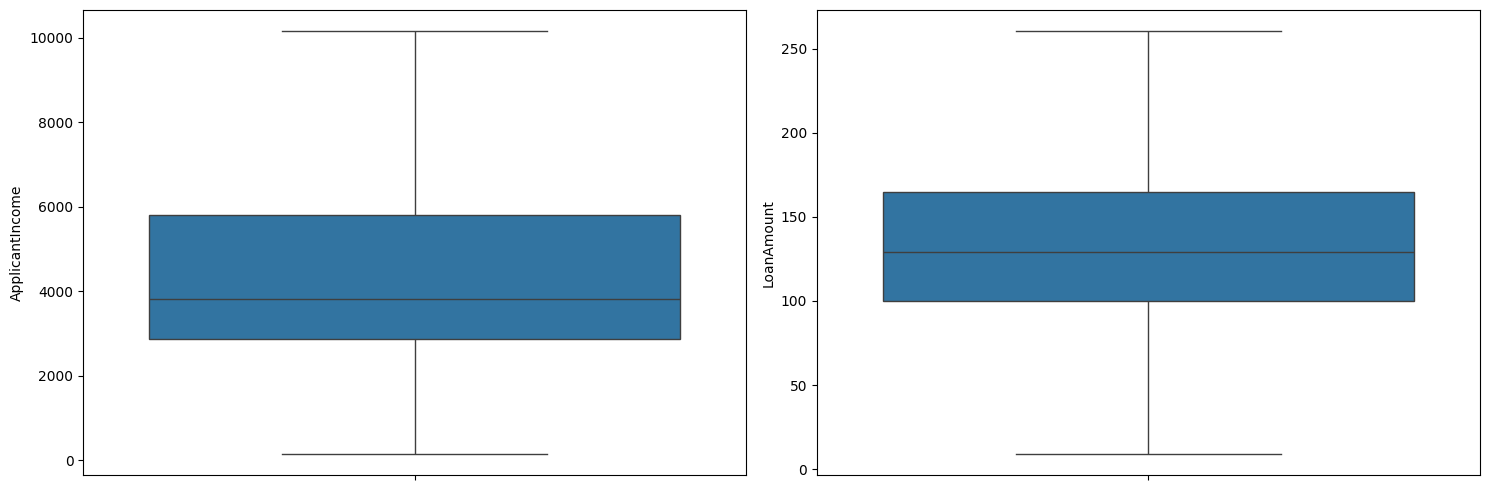

In [642]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(data[col])
plt.tight_layout()
plt.show()

## **MODEL BUILDING**

In [643]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


In [644]:
kfold_validator=KFold(10)
from sklearn.model_selection import StratifiedKFold
stratified_cv=StratifiedKFold(n_splits=10)
from sklearn.model_selection import cross_val_score

In [645]:
x=data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# **Logistic Regression**

In [646]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression(solver='liblinear')
LogReg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [647]:
y_pred=LogReg.predict(x_test)

Classification report without cross validation

In [648]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



In [649]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Accuracy: 0.7727272727272727
precision_score: 0.7480916030534351
recall_score: 0.98
f1_score: 0.8484848484848484


In [650]:
log_score = cross_val_score(LogReg, x_train, y_train,cv=5)
print("Logistic Regression: ", round(log_score.mean(),2)*100, "% accuracy score")

Logistic Regression:  82.0 % accuracy score


# **KNN**

In [651]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [652]:
metric_k=[]
neighbors=np.arange(3,15)

In [653]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

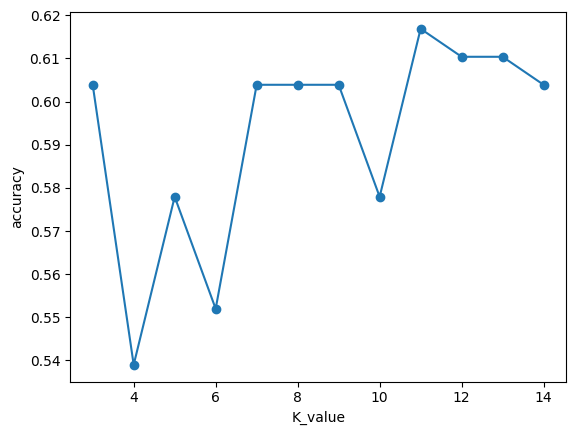

In [654]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [655]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [656]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# **After standard scaling**

In [657]:
from sklearn.neighbors import KNeighborsClassifier

In [658]:
metric_k=[]
neighbors=np.arange(3,15)

In [659]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

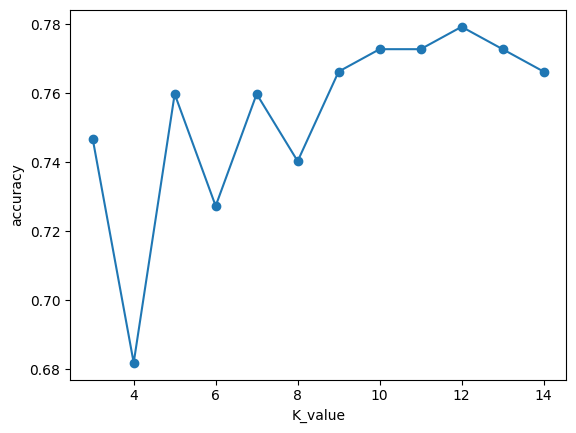

In [660]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

Highest accuracy for Kvalue=10


In [661]:
classifier=KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)

In [662]:
print('Accuracy:',accuracy_score(y_test,y_pred_knn))
print('precision_score:',precision_score(y_test,y_pred_knn))
print('recall_score:',recall_score(y_test,y_pred_knn))
print('f1_score:',f1_score(y_test,y_pred_knn))

Accuracy: 0.7727272727272727
precision_score: 0.7559055118110236
recall_score: 0.96
f1_score: 0.8458149779735682


In [663]:
knn_score = cross_val_score(classifier, x_train, y_train,cv=5)
print("KNeighbors: ", round(knn_score.mean(),2)*100, "% accuracy score")

KNeighbors:  80.0 % accuracy score


# **Logistic Regression** After scaling

In [664]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression(solver='liblinear')
LogReg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [665]:
y_pred=LogReg.predict(x_test)

Classification report without cross validation

In [666]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



In [667]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Accuracy: 0.7727272727272727
precision_score: 0.7480916030534351
recall_score: 0.98
f1_score: 0.8484848484848484


In [668]:
log_score = cross_val_score(LogReg, x_train, y_train,cv=5)
print("Logistic Regression: ", round(log_score.mean(),2)*100, "% accuracy score")

Logistic Regression:  82.0 % accuracy score


# **SVM model**

In [669]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='linear')
sv_cl.fit(x_train,y_train)

SVC(kernel='linear')

In [670]:
y_pred=sv_cl.predict(x_test)

In [671]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [672]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Accuracy: 0.7727272727272727
precision_score: 0.7480916030534351
recall_score: 0.98
f1_score: 0.8484848484848484


In [673]:
svc_score = cross_val_score(sv_cl, x_train, y_train,cv=5)
print("Support Vector Machine: ", round(svc_score.mean(),2)*100, "% accuracy score")

Support Vector Machine:  82.0 % accuracy score


In [674]:
#SVM model,Kernal='poly'

from sklearn.svm import SVC
sv_cl=SVC(kernel='poly')
sv_cl.fit(x_train,y_train)


y_pred=sv_cl.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score


print('Accuracy:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

print('Accuracy is',accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))



Accuracy: 0.7597402597402597
precision_score: 0.7480314960629921
recall_score: 0.95
f1_score: 0.8370044052863436
Accuracy is 0.7597402597402597
[[22 32]
 [ 5 95]]


In [675]:
svc_score = cross_val_score(sv_cl, x_train, y_train,cv=5)
print("Support Vector Machine: ", round(svc_score.mean(),2)*100, "% accuracy score")

Support Vector Machine:  81.0 % accuracy score


In [676]:
#SVM model,kernal='rbf'


from sklearn.svm import SVC
sv_clRBF=SVC(kernel='rbf')
sv_clRBF.fit(x_train,y_train)


y_pred=sv_clRBF.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score



print('Accuracy is',accuracy_score(y_test,y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))


Accuracy is 0.7792207792207793
Accuracy: 0.7792207792207793
precision_score: 0.7538461538461538
recall_score: 0.98
f1_score: 0.8521739130434782
[[22 32]
 [ 2 98]]


In [677]:
svc_score = cross_val_score(sv_clRBF, x_train, y_train,cv=5)
print("Support Vector Machine: ", round(svc_score.mean(),2)*100, "% accuracy score")

Support Vector Machine:  82.0 % accuracy score


# **Decision** **Tree**

In [678]:
dcTree = DecisionTreeClassifier()
dcTree.fit(x_train, y_train)
dcTree_score = cross_val_score(dcTree, x_train, y_train, cv=5)
print("Decision Tree: ", round(dcTree_score.mean(),2)*100, "% accuracy score")

Decision Tree:  73.0 % accuracy score


## **Random Forest**

In [679]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_score = cross_val_score(rf, x_train, y_train, cv=5)
print("Random Forest: ",  round(rf_score.mean(),2)*100, "% accuracy score")

Random Forest:  80.0 % accuracy score


## **MODEL SELECTION**

Logistic Regression:  82.0 % accuracy score

KNeighbors:  80.0 % accuracy score

Support Vector Machine:  82.0 % accuracy score

Decision Tree:  73.0 % accuracy score

Random Forest:  79.0 % accuracy score

From the croass validated scores of the different models , we are selecting the Logistic Regression and SVM


Logistic regression

Accuracy: 0.7727272727272727

precision_score: 0.7480916030534351

recall_score: 0.98

f1_score: 0.8484848484848484

SVM 'RBF'

Accuracy is 0.7792207792207793

precision_score: 0.7538461538461538

recall_score: 0.98

f1_score: 0.8521739130434782

From the above two models,
we are selcting the SVM 'rbf' MODEL

###  **Predicition**

# **1.Reading the data1 to python environment**

In [725]:
data1=pd.read_csv('/content/test_lAUu6dG.csv')

In [726]:
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [728]:
Test_data1=data1

# **Preprocessing**

In [729]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [730]:
data1.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# **Treating the missing values**

In [731]:
data1['Gender']=data1['Gender'].fillna(data1['Gender'].mode()[0])
data1['Married']=data1['Married'].fillna(data1['Married'].mode()[0])
data1['Dependents']=data1['Dependents'].fillna(data1['Dependents'].mode()[0])
data1['Self_Employed']=data1['Self_Employed'].fillna(data1['Self_Employed'].mode()[0])
data1['LoanAmount']=data1['LoanAmount'].fillna(data1['LoanAmount'].mean())
data1['Credit_History']=data1['Credit_History'].fillna(data1['Credit_History'].mode()[0])
data1['Loan_Amount_Term']=data1['Loan_Amount_Term'].fillna(data1['Loan_Amount_Term'].mean())


In [732]:
data1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [733]:
data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.839237
std,4910.685399,2334.232099,60.946040,64.620366,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [734]:
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# **Label Encoding the features**

In [735]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data11=data1[['Gender','Married','Education','Self_Employed','Property_Area','Dependents']]

data11_en=data11.apply(lb.fit_transform)
data11_en

,Gender,Married,Education,Self_Employed,Property_Area,Dependents
0,1,1,0,0,2,0
1,1,1,0,0,2,1
2,1,1,0,0,2,2
3,1,1,0,0,2,2
4,1,0,1,0,2,0
...,...,...,...,...,...,...
362,1,1,1,1,2,3
363,1,1,0,0,2,0
364,1,0,0,0,1,0
365,1,1,0,0,0,0


In [736]:
data1=data1.drop(['Gender','Married','Education','Self_Employed','Property_Area','Dependents'],axis=1)

In [737]:
data1=pd.concat([data1,data11_en],axis=1,verify_integrity=True)

In [738]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   ApplicantIncome    367 non-null    int64  
 2   CoapplicantIncome  367 non-null    int64  
 3   LoanAmount         367 non-null    float64
 4   Loan_Amount_Term   367 non-null    float64
 5   Credit_History     367 non-null    float64
 6   Gender             367 non-null    int64  
 7   Married            367 non-null    int64  
 8   Education          367 non-null    int64  
 9   Self_Employed      367 non-null    int64  
 10  Property_Area      367 non-null    int64  
 11  Dependents         367 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 34.5+ KB


In [739]:
dataID=data1['Loan_ID']

In [740]:
data1=data1.drop(['Loan_ID'],axis=1)

In [741]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    367 non-null    int64  
 1   CoapplicantIncome  367 non-null    int64  
 2   LoanAmount         367 non-null    float64
 3   Loan_Amount_Term   367 non-null    float64
 4   Credit_History     367 non-null    float64
 5   Gender             367 non-null    int64  
 6   Married            367 non-null    int64  
 7   Education          367 non-null    int64  
 8   Self_Employed      367 non-null    int64  
 9   Property_Area      367 non-null    int64  
 10  Dependents         367 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 31.7 KB


[]

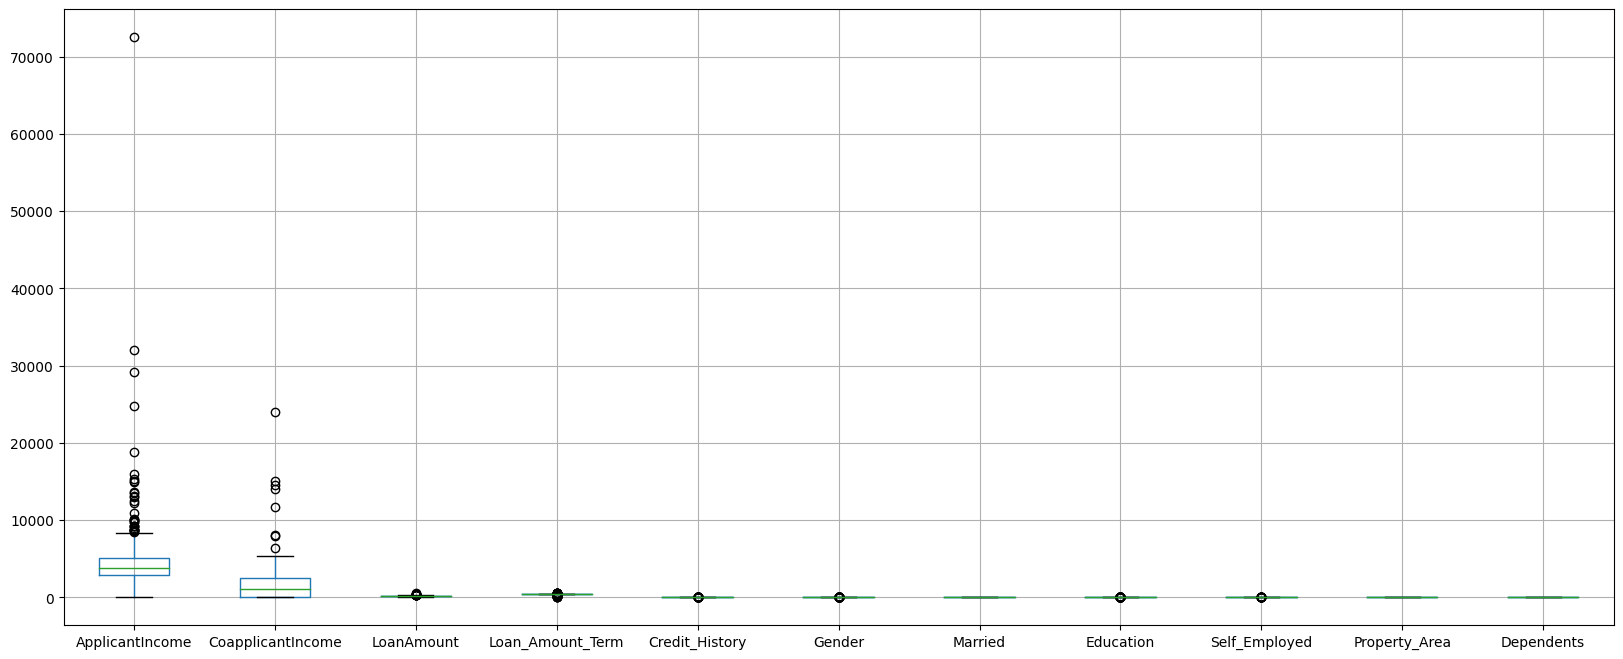

In [742]:
plt.subplots(figsize=(20,8))
data1.boxplot(return_type='dict')
plt.plot()

Maximum outliers are for Applicant income,coapplicant income

# **Outlier handling**

Applicant Income

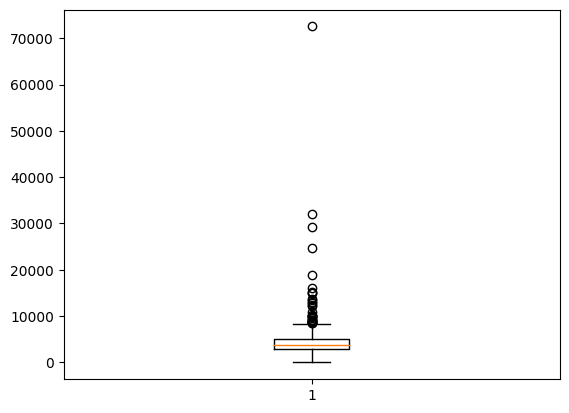

In [743]:
plt.boxplot(data1['ApplicantIncome'])
plt.show()

In [744]:
Q1=np.percentile(data1['ApplicantIncome'],25,method='midpoint')
Q2=np.percentile(data1['ApplicantIncome'],50,method='midpoint')
Q3=np.percentile(data1['ApplicantIncome'],75,method='midpoint')
print(Q1,Q2,Q3)

2864.0 3786.0 5060.0


In [745]:
IQR=Q3-Q1
print(IQR)


2196.0


In [746]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('lower whisker',low_lim,'upper whisker',up_lim)

lower whisker -430.0 upper whisker 8354.0


In [747]:
outlier=[]
for x in data1['ApplicantIncome']:
  if((x<low_lim)or (x>up_lim)):
    outlier.append(x)
print(outlier)

[13633, 12173, 9226, 72529, 8449, 13518, 9719, 12500, 32000, 10890, 12941, 8703, 15312, 10166, 9167, 13083, 10000, 8706, 14911, 10000, 18840, 24797, 29167, 9000, 10000, 8750, 14987, 16000, 9699, 8667, 8550, 9200]


In [748]:
from abc import update_abstractmethods
data1['ApplicantIncome'] =data1['ApplicantIncome'].clip(lower=low_lim,upper=up_lim)

In [749]:
outlier=[]
for x in data1['ApplicantIncome']:
  if((x<low_lim)or (x>up_lim)):
    outlier.append(x)
print(outlier)

[]


Loan amount

In [750]:
Q1=np.percentile(data1['LoanAmount'],25,method='midpoint')
Q2=np.percentile(data1['LoanAmount'],50,method='midpoint')
Q3=np.percentile(data1['LoanAmount'],75,method='midpoint')
print(Q1,Q2,Q3)

101.0 126.0 157.5


In [751]:
IQR=Q3-Q1
print(IQR)


56.5


In [752]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('lower whisker',low_lim,'upper whisker',up_lim)

lower whisker 16.25 upper whisker 242.25


In [753]:
outlier=[]
for x in data1['LoanAmount']:
  if((x<low_lim)or (x>up_lim)):
    outlier.append(x)
print(outlier)

[280.0, 300.0, 290.0, 275.0, 360.0, 257.0, 390.0, 256.0, 300.0, 550.0, 260.0, 336.0, 412.0, 460.0, 297.0, 300.0, 260.0, 254.0]


In [754]:
from abc import update_abstractmethods
data1['LoanAmount'] =data1['LoanAmount'].clip(lower=low_lim,upper=up_lim)

In [755]:
outlier=[]
for x in data1['LoanAmount']:
  if((x<low_lim)or (x>up_lim)):
    outlier.append(x)
print(outlier)

[]


## **Prediction using SVM 'rbf' Model**

In [756]:
x_test=data1


In [757]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [758]:

x_test=sc.fit_transform(x_test)

In [759]:

y_pred=sv_clRBF.predict(x_test)

In [760]:
x_test

array([[ 0.7601616 , -0.67333511, -0.47184452, ..., -0.33484506,
         1.11876379, -0.75822199],
       [-0.59690741, -0.02984821, -0.13038342, ..., -0.33484506,
         1.11876379,  0.18187082],
       [ 0.3906118 ,  0.09884917,  1.61960472, ..., -0.33484506,
         1.11876379,  1.12196363],
       ...,
       [-0.50759954,  0.18164449, -0.13038342, ..., -0.33484506,
        -0.09598861, -0.75822199],
       [ 0.3906118 ,  0.353241  ,  0.55253878, ..., -0.33484506,
        -1.31074101, -0.75822199],
       [ 2.11209798, -0.67333511, -0.72794035, ...,  2.98645591,
        -1.31074101, -0.75822199]])

In [761]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [762]:
Loan_y_s=pd.DataFrame(y_pred)
Loan_y_s
data3 = pd.concat([dataID, Loan_y_s], axis=1, ignore_index=True)
data3.columns=['Loan_ID', 'Loan_Status']
data3['Loan_Status']=data3['Loan_Status'].map({1:'Yes',0:'No'})
data3



,Loan_ID,Loan_Status
0,LP001015,Yes
1,LP001022,Yes
2,LP001031,Yes
3,LP001035,Yes
4,LP001051,Yes
...,...,...
362,LP002971,Yes
363,LP002975,Yes
364,LP002980,Yes
365,LP002986,Yes


In [770]:
data3.set_index(['Loan_ID'])

,Loan_Status
Loan_ID,
LP001015,Yes
LP001022,Yes
LP001031,Yes
LP001035,Yes
LP001051,Yes
...,...
LP002971,Yes
LP002975,Yes
LP002980,Yes


In [800]:
data3.to_csv('Test_Result.csv',index=False)

In [798]:
Final=pd.concat([Test_data1,data3['Loan_Status']],verify_integrity=True,axis=1)
Final

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Yes
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Yes
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Yes
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,Yes
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Yes
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Yes
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,Yes
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Yes


In [801]:
Final.to_csv('Final_data.csv')